In [17]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras



from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

from zipfile import ZipFile

In [7]:
with ZipFile('/content/drive/MyDrive/archive (2).zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Dataset')

In [15]:
train_directory = "/content/drive/MyDrive/Dataset/images/train"
val_directory =  "/content/drive/MyDrive/Dataset/images/validation"

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (48, 48),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(val_directory,
                                            target_size = (48, 48),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [20]:
import os
folder_path = "/content/drive/MyDrive/Dataset/images/train"
folders = os.listdir(folder_path)
len(folders)

7

In [21]:
Model=Sequential([
    (Conv2D(64,(3,3),activation='relu',padding = 'same',input_shape=(48,48,3))),
    (MaxPooling2D(pool_size=(2,2))),
    (Conv2D(128,(5,5),activation='relu',padding = 'same')),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.25)),
    (Conv2D(512,(3,3),activation='relu',padding = 'same')),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.25)),
    (Conv2D(512,(3,3),activation='relu')),
    (MaxPooling2D(pool_size=(2,2))),
    (Dropout(0.25)),
    (Flatten()),
    (Dense(256,activation='relu')),
    (Dropout(0.5)),
    (Dense(512,activation='relu')),
    (Dropout(0.5)),
    (Dense(units=len(folders),activation='softmax')),
])

In [22]:
Model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
Result=Model.fit(training_set,
    steps_per_epoch=len(training_set),
    validation_data=val_set,
    validation_steps=len(val_set),
    epochs=50
)

Epoch 1/50
226/226 [==============================] - 76s 278ms/step - loss: 1.8489 - accuracy: 0.2300 - val_loss: 1.8249 - val_accuracy: 0.2583
Epoch 2/50
226/226 [==============================] - 62s 275ms/step - loss: 1.8264 - accuracy: 0.2411 - val_loss: 1.8138 - val_accuracy: 0.2583
Epoch 3/50
226/226 [==============================] - 62s 275ms/step - loss: 1.7958 - accuracy: 0.2566 - val_loss: 1.7301 - val_accuracy: 0.3278
Epoch 4/50
226/226 [==============================] - 62s 273ms/step - loss: 1.7105 - accuracy: 0.3087 - val_loss: 1.6367 - val_accuracy: 0.3755
Epoch 5/50
226/226 [==============================] - 62s 275ms/step - loss: 1.6407 - accuracy: 0.3472 - val_loss: 1.5332 - val_accuracy: 0.4072
Epoch 6/50
226/226 [==============================] - 61s 271ms/step - loss: 1.5797 - accuracy: 0.3826 - val_loss: 1.4549 - val_accuracy: 0.4434
Epoch 7/50
226/226 [==============================] - 62s 273ms/step - loss: 1.5219 - accuracy: 0.4102 - val_loss: 1.4238 - val_ac

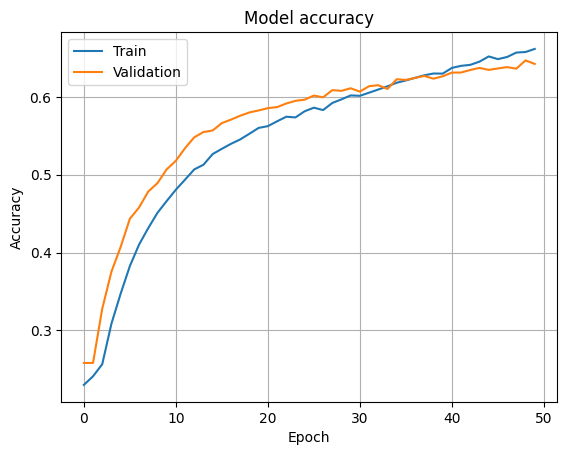

In [24]:
# Plot training & validation accuracy values
plt.plot(Result.history['accuracy'])
plt.plot(Result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

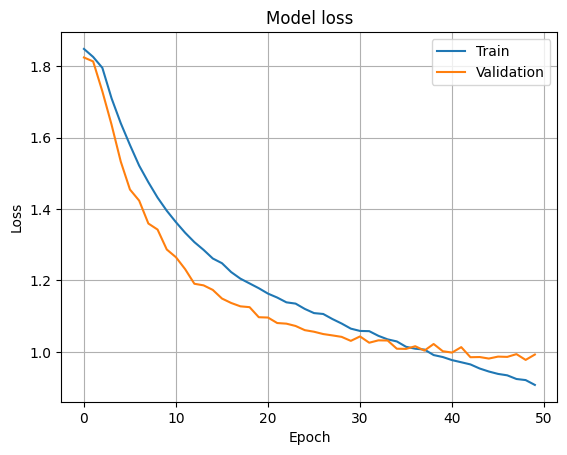

In [27]:
# Plot training & validation loss values
plt.plot(Result.history['loss'])
plt.plot(Result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
true_classes = val_set.classes
predicted_classes = Model.predict(val_set).argmax(axis=-1)
class_labels = list(val_set.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

56/56 [==============================] - 8s 134ms/step
[[171   7  74 260 183 161 104]
 [ 19   1   8  27  19  21  16]
 [162   6  99 282 209 136 124]
 [298  14 167 510 385 284 167]
 [179  10 112 336 275 187 117]
 [167   6 101 303 245 193 124]
 [111   4  78 224 184 135  61]]
